In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## MANULAY SELECTING THE FEATURES AND JOINING THE DATA INTO  A SINGLE FILE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
results=pd.read_csv('/content/drive/MyDrive/new project/results.csv')
driver_standings=pd.read_csv('/content/drive/MyDrive/new project/driver_standings.csv')
constructor_standing=pd.read_csv('/content/drive/MyDrive/new project/constructor_standings.csv')
qualifying=pd.read_csv('/content/drive/MyDrive/new project/qualifying.csv')
lap_time=pd.read_csv('/content/drive/MyDrive/new project/lap_times.csv')

## REVIWING DATAS FROM EACH DATASET TO DETERMINE WHICH NEED TO BE USED

In [ ]:
results.head(2)


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1


In [ ]:
driver_standings.head(3)


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0


In [ ]:
constructor_standing.head(3)


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0


In [ ]:
qualifying.head(2)


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869


In [ ]:
lap_time.head(2)

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006


In [ ]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

In [ ]:
driver_standings.columns

Index(['driverStandingsId', 'raceId', 'driverId', 'points', 'position',
       'positionText', 'wins'],
      dtype='object')

In [ ]:
lap_time.columns

Index(['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds'], dtype='object')

In [ ]:
constructor_standing.columns

Index(['constructorStandingsId', 'raceId', 'constructorId', 'points',
       'position', 'positionText', 'wins'],
      dtype='object')

In [ ]:
qualifying.columns

Index(['qualifyId', 'raceId', 'driverId', 'constructorId', 'number',
       'position', 'q1', 'q2', 'q3'],
      dtype='object')

## SELECTING AND MERGING THE DATASET

In [ ]:
# Select only the specified columns from each dataset
results_cols = ['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid', 'position', 'positionText',
                'positionOrder', 'points', 'laps', 'time', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
                'fastestLapSpeed', 'statusId']
driver_standings_cols = ['driverStandingsId', 'raceId', 'driverId', 'points', 'position', 'positionText', 'wins']
lap_times_cols = ['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds']
constructor_standings_cols = ['constructorStandingsId', 'raceId', 'constructorId', 'points', 'position', 'positionText', 'wins']
qualifying_cols = ['qualifyId', 'raceId', 'driverId', 'constructorId', 'number', 'position', 'q1', 'q2', 'q3']




In [ ]:
results = results[results_cols]
driver_standings = driver_standings[driver_standings_cols]
lap_times = lap_time[lap_times_cols]
constructor_standings = constructor_standing[constructor_standings_cols]
qualifying = qualifying[qualifying_cols]


In [ ]:
# Rename columns to avoid ambiguity during merge (add prefix to overlapping columns)
results = results.rename(columns={
    'position': 'result_position', 'positionText': 'result_positionText', 'points': 'result_points',
    'time': 'result_time', 'milliseconds': 'result_milliseconds'
})
driver_standings = driver_standings.rename(columns={
    'points': 'driver_points', 'position': 'driver_position', 'positionText': 'driver_positionText'
})
lap_times = lap_times.rename(columns={
    'position': 'lap_position', 'time': 'lap_time', 'milliseconds': 'lap_milliseconds'
})
constructor_standings = constructor_standings.rename(columns={
    'points': 'constructor_points', 'position': 'constructor_position', 'positionText': 'constructor_positionText'
})
qualifying = qualifying.rename(columns={'position': 'qualifying_position'})



In [ ]:
# Merge datasets using left joins on common keys (raceId, driverId, constructorId where applicable)
merged = results.merge(
    driver_standings, on=['raceId', 'driverId'], how='left'
).merge(
    lap_times, on=['raceId', 'driverId'], how='left'
).merge(
    constructor_standings, on=['raceId', 'constructorId'], how='left'
).merge(
    qualifying, on=['raceId', 'driverId', 'constructorId'], how='left'
)



In [ ]:
# Save the merged dataset to a CSV file
merged.to_csv('merged_dataset.csv', index=False)

In [ ]:
# Print the first few rows and column names to verify
print("Merged Dataset Columns:")
merged.columns.tolist()

Merged Dataset Columns:


['resultId',
 'raceId',
 'driverId',
 'constructorId',
 'number_x',
 'grid',
 'result_position',
 'result_positionText',
 'positionOrder',
 'result_points',
 'laps',
 'result_time',
 'result_milliseconds',
 'fastestLap',
 'rank',
 'fastestLapTime',
 'fastestLapSpeed',
 'statusId',
 'driverStandingsId',
 'driver_points',
 'driver_position',
 'driver_positionText',
 'wins_x',
 'lap',
 'lap_position',
 'lap_time',
 'lap_milliseconds',
 'constructorStandingsId',
 'constructor_points',
 'constructor_position',
 'constructor_positionText',
 'wins_y',
 'qualifyId',
 'number_y',
 'qualifying_position',
 'q1',
 'q2',
 'q3']

In [ ]:
print("\nMerged Dataset Preview:")
merged.head(2)


Merged Dataset Preview:


,resultId,raceId,driverId,constructorId,number_x,grid,result_position,result_positionText,positionOrder,result_points,...,constructor_points,constructor_position,constructor_positionText,wins_y,qualifyId,number_y,qualifying_position,q1,q2,q3
0,1,18,1,1,22,1,1,1,1,10.0,...,14.0,1.0,1,1.0,1.0,22.0,1.0,1:26.572,1:25.187,1:26.714
1,1,18,1,1,22,1,1,1,1,10.0,...,14.0,1.0,1,1.0,1.0,22.0,1.0,1:26.572,1:25.187,1:26.714


In [ ]:
merged.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid',
       'result_position', 'result_positionText', 'positionOrder',
       'result_points', 'laps', 'result_time', 'result_milliseconds',
       'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId',
       'driverStandingsId', 'driver_points', 'driver_position',
       'driver_positionText', 'wins_x', 'lap', 'lap_position', 'lap_time',
       'lap_milliseconds', 'constructorStandingsId', 'constructor_points',
       'constructor_position', 'constructor_positionText', 'wins_y',
       'qualifyId', 'number_y', 'qualifying_position', 'q1', 'q2', 'q3'],
      dtype='object')

## FIRST PHASE OF THE PROJECT IS DATA COLLECTED  AND COLUMNS ARE MERGED INTO A SINGLE DATASET

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/new project/merged_dataset.csv')

/tmp/ipython-input-26-106954164.py:2: DtypeWarning: Columns (4,14,21,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/new project/merged_dataset.csv')


In [ ]:
df.head(3)

,resultId,raceId,driverId,constructorId,number_x,grid,result_position,result_positionText,positionOrder,result_points,...,constructor_points,constructor_position,constructor_positionText,wins_y,qualifyId,number_y,qualifying_position,q1,q2,q3
0,1,18,1,1,22,1,1,1,1,10.0,...,14.0,1.0,1.0,1.0,1.0,22.0,1.0,1:26.572,1:25.187,1:26.714
1,1,18,1,1,22,1,1,1,1,10.0,...,14.0,1.0,1.0,1.0,1.0,22.0,1.0,1:26.572,1:25.187,1:26.714
2,1,18,1,1,22,1,1,1,1,10.0,...,14.0,1.0,1.0,1.0,1.0,22.0,1.0,1:26.572,1:25.187,1:26.714


In [ ]:
df.tail(3)

,resultId,raceId,driverId,constructorId,number_x,grid,result_position,result_positionText,positionOrder,result_points,...,constructor_points,constructor_position,constructor_positionText,wins_y,qualifyId,number_y,qualifying_position,q1,q2,q3
604796,26763,1144,861,3,43,20,\N,R,19,0.0,...,17.0,9.0,9,0.0,10550.0,43.0,19.0,1:23.912,\N,\N
604797,26763,1144,861,3,43,20,\N,R,19,0.0,...,17.0,9.0,9,0.0,10550.0,43.0,19.0,1:23.912,\N,\N
604798,26764,1144,815,9,11,10,\N,R,20,0.0,...,589.0,3.0,3,9.0,10541.0,11.0,10.0,1:23.559,1:23.379,1:23.264


In [ ]:
df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid',
       'result_position', 'result_positionText', 'positionOrder',
       'result_points', 'laps', 'result_time', 'result_milliseconds',
       'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId',
       'driverStandingsId', 'driver_points', 'driver_position',
       'driver_positionText', 'wins_x', 'lap', 'lap_position', 'lap_time',
       'lap_milliseconds', 'constructorStandingsId', 'constructor_points',
       'constructor_position', 'constructor_positionText', 'wins_y',
       'qualifyId', 'number_y', 'qualifying_position', 'q1', 'q2', 'q3'],
      dtype='object')

In [ ]:
df['result_position'].isnull().sum()

np.int64(0)

In [ ]:
df.shape

(604799, 38)

In [ ]:
df.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,result_points,laps,statusId,driverStandingsId,...,lap,lap_position,lap_milliseconds,constructorStandingsId,constructor_points,constructor_position,wins_y,qualifyId,number_y,qualifying_position
count,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,598613.000000,...,589081.000000,589081.000000,5.890810e+05,600936.000000,600936.000000,600936.000000,600936.000000,504782.000000,504782.000000,504782.000000
mean,14790.834140,598.646704,323.854730,45.551987,10.664826,9.795390,3.895071,58.562660,7.743554,46122.289586,...,30.018104,9.661951,9.579945e+04,19341.748100,75.017365,5.632936,1.025632,5590.835995,19.131679,10.735226
std,10383.662637,429.871460,383.705571,71.017367,6.231850,5.685834,6.117693,13.483261,13.660560,28493.954265,...,18.407126,5.528553,7.639973e+04,10469.234065,121.365776,3.112301,2.466508,3065.840260,19.378984,6.125997
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,5.540400e+04,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,3008.000000,144.000000,16.000000,4.000000,5.000000,5.000000,0.000000,53.000000,1.000000,12431.000000,...,14.000000,5.000000,8.204100e+04,6236.000000,5.000000,3.000000,0.000000,3368.000000,7.000000,5.000000
50%,21119.000000,855.000000,50.000000,10.000000,10.000000,9.000000,0.000000,58.000000,1.000000,65340.000000,...,29.000000,9.000000,9.060800e+04,25350.000000,25.000000,5.000000,0.000000,5781.000000,14.000000,11.000000
75%,23992.000000,999.000000,822.000000,25.000000,16.000000,14.000000,6.000000,69.000000,11.000000,69453.000000,...,44.000000,14.000000,1.019300e+05,27303.000000,86.000000,8.000000,1.000000,8199.000000,22.000000,16.000000
max,26764.000000,1144.000000,862.000000,215.000000,34.000000,39.000000,50.000000,200.000000,141.000000,73270.000000,...,87.000000,24.000000,7.507547e+06,28982.000000,860.000000,21.000000,21.000000,10551.000000,99.000000,28.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604799 entries, 0 to 604798
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   resultId                  604799 non-null  int64  
 1   raceId                    604799 non-null  int64  
 2   driverId                  604799 non-null  int64  
 3   constructorId             604799 non-null  int64  
 4   number_x                  604799 non-null  object 
 5   grid                      604799 non-null  int64  
 6   result_position           604799 non-null  object 
 7   result_positionText       604799 non-null  object 
 8   positionOrder             604799 non-null  int64  
 9   result_points             604799 non-null  float64
 10  laps                      604799 non-null  int64  
 11  result_time               604799 non-null  object 
 12  result_milliseconds       604799 non-null  object 
 13  fastestLap                604799 non-null  o

#### CONVERING THE DTYPES FROM OBJECT TO INT

In [ ]:
# Define columns to exclude
exclude_cols = ['fastestLapTime', 'lap_time', 'q1', 'q2', 'q3','result_position']

# Get object columns in the DataFrame
object_columns = df.select_dtypes(include='object').columns.tolist()

# Determine which object columns to convert (excluding the ones we don't want to touch)
columns_to_convert = [col for col in object_columns if col not in exclude_cols]

# Convert ONLY non-excluded object columns to numeric
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
df.dtypes

,0
resultId,int64
raceId,int64
driverId,int64
constructorId,int64
number_x,float64
grid,int64
result_position,object
result_positionText,float64
positionOrder,int64
result_points,float64


#### REVIWING FOR NULL VALUES

In [ ]:
null_values=df.columns[df.isnull().any().tolist()]
null_values

Index(['number_x', 'result_positionText', 'result_time', 'result_milliseconds',
       'fastestLap', 'rank', 'fastestLapSpeed', 'driverStandingsId',
       'driver_points', 'driver_position', 'driver_positionText', 'wins_x',
       'lap', 'lap_position', 'lap_time', 'lap_milliseconds',
       'constructorStandingsId', 'constructor_points', 'constructor_position',
       'constructor_positionText', 'wins_y', 'qualifyId', 'number_y',
       'qualifying_position', 'q1', 'q2', 'q3'],
      dtype='object')

#### FILLING THE NAN VALUES WITH THE MEDIAN

In [ ]:
columns_to_fill=['fastestLapSpeed', 'driverStandingsId', 'driver_points',
       'driver_position', 'driver_positionText', 'wins_x', 'lap',
       'lap_position', 'lap_milliseconds',
       'constructorStandingsId', 'constructor_points', 'constructor_position',
       'constructor_positionText', 'wins_y', 'qualifyId', 'number_y',
       'qualifying_position',]

In [ ]:
for col in columns_to_fill:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

In [ ]:
df.isnull().sum()

,0
resultId,0
raceId,0
driverId,0
constructorId,0
number_x,6
grid,0
result_position,0
result_positionText,73900
positionOrder,0
result_points,0


### FILLING THE NAN VALUES FOR THE OBJECT COLUMNS

In [ ]:
df[['q1','q2','q3','fastestLapTime','lap_time']].head()

,q1,q2,q3,fastestLapTime,lap_time
0,1:26.572,1:25.187,1:26.714,1:27.452,2:01.465
1,1:26.572,1:25.187,1:26.714,1:27.452,2:32.471
2,1:26.572,1:25.187,1:26.714,1:27.452,1:29.257
3,1:26.572,1:25.187,1:26.714,1:27.452,1:28.614
4,1:26.572,1:25.187,1:26.714,1:27.452,1:28.556


In [ ]:
df[['q1','q2','q3','fastestLapTime','lap_time']].isnull().sum()

,0
q1,100017
q2,101227
q3,102586
fastestLapTime,0
lap_time,15718


In [ ]:
import pandas as pd

# Columns to clean
time_cols = ['q1', 'q2', 'q3', 'fastestLapTime', 'lap_time']

for col in time_cols:
    # Convert to timedelta (format: MM:SS.sss)
    df[col] = pd.to_timedelta('00:' + df[col], errors='coerce')

    # Fill NaT with median (timedelta median)
    median_time = df[col].median()
    df[col] = df[col].fillna(median_time)


In [ ]:
df[['q1','q2','q3','fastestLapTime','lap_time']].isnull().sum()

,0
q1,0
q2,0
q3,0
fastestLapTime,0
lap_time,0


In [ ]:
df.isnull().sum()

,0
resultId,0
raceId,0
driverId,0
constructorId,0
number_x,6
grid,0
result_position,0
result_positionText,73900
positionOrder,0
result_points,0


In [ ]:
null_values=df.columns[df.isnull().any().tolist()]
null_values

Index(['number_x', 'result_positionText', 'result_time', 'result_milliseconds',
       'fastestLap', 'rank'],
      dtype='object')

In [ ]:
df[['number_x', 'result_position', 'result_positionText', 'result_time',
       'result_milliseconds', 'fastestLap', 'rank']].isnull().sum()

,0
number_x,6
result_position,0
result_positionText,73900
result_time,409576
result_milliseconds,297399
fastestLap,149780
rank,147962


In [ ]:
df[['number_x', 'result_position', 'result_positionText', 'result_time',
       'result_milliseconds', 'fastestLap', 'rank']].head()

,number_x,result_position,result_positionText,result_time,result_milliseconds,fastestLap,rank
0,22.0,1,1.0,NaN,5690616.0,39.0,2.0
1,22.0,1,1.0,NaN,5690616.0,39.0,2.0
2,22.0,1,1.0,NaN,5690616.0,39.0,2.0
3,22.0,1,1.0,NaN,5690616.0,39.0,2.0
4,22.0,1,1.0,NaN,5690616.0,39.0,2.0


In [ ]:
# Fill strategies per column
df['number_x'] = df['number_x'].fillna(df['number_x'].mode()[0])
#df['result_position'] = df['result_position'].fillna(df['result_position'].mean())
df['result_positionText'] = df['result_positionText'].fillna('Unknown')
df['result_time'] = df['result_time'].fillna('0:00.000')
df['result_milliseconds'] = df['result_milliseconds'].fillna(df['result_milliseconds'].median())
df['fastestLap'] = df['fastestLap'].fillna(df['fastestLap'].mode()[0])
df['rank'] = df['rank'].fillna(df['rank'].median())


In [ ]:
df[['number_x', 'result_position', 'result_positionText', 'result_time',
       'result_milliseconds', 'fastestLap', 'rank']].isnull().sum()

,0
number_x,0
result_position,0
result_positionText,0
result_time,0
result_milliseconds,0
fastestLap,0
rank,0


## SAVING THE CLEANED DATA INTO A NEW CSV FILE

In [ ]:
df.to_csv('final_cleaned_f1_data.csv', index=False)


## VISUALIZATION

In [4]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/new project/final_cleaned_f1_data.csv')
df.head(5)

,resultId,raceId,driverId,constructorId,number_x,grid,result_position,result_positionText,positionOrder,result_points,...,constructor_points,constructor_position,constructor_positionText,wins_y,qualifyId,number_y,qualifying_position,q1,q2,q3
0,1,18,1,1,22.0,1,1,1.0,1,10.0,...,14.0,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000
1,1,18,1,1,22.0,1,1,1.0,1,10.0,...,14.0,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000
2,1,18,1,1,22.0,1,1,1.0,1,10.0,...,14.0,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000
3,1,18,1,1,22.0,1,1,1.0,1,10.0,...,14.0,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000
4,1,18,1,1,22.0,1,1,1.0,1,10.0,...,14.0,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000


In [5]:
df['result_position']

,result_position
0,1
1,1
2,1
3,1
4,1
...,...
604794,\N
604795,\N
604796,\N
604797,\N


In [6]:
# Show all columns
pd.set_option('display.max_columns', None)
df.head()

,resultId,raceId,driverId,constructorId,number_x,grid,result_position,result_positionText,positionOrder,result_points,laps,result_time,result_milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverStandingsId,driver_points,driver_position,driver_positionText,wins_x,lap,lap_position,lap_time,lap_milliseconds,constructorStandingsId,constructor_points,constructor_position,constructor_positionText,wins_y,qualifyId,number_y,qualifying_position,q1,q2,q3
0,1,18,1,1,22.0,1,1,1.0,1,10.0,58,NaN,5690616.0,39.0,2.0,0 days 00:01:27.452000,218.3,1,1.0,10.0,1.0,1.0,1.0,1.0,1.0,0 days 00:02:01.465000,121465.0,1.0,14.0,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000
1,1,18,1,1,22.0,1,1,1.0,1,10.0,58,NaN,5690616.0,39.0,2.0,0 days 00:01:27.452000,218.3,1,1.0,10.0,1.0,1.0,1.0,2.0,1.0,0 days 00:02:32.471000,152471.0,1.0,14.0,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000
2,1,18,1,1,22.0,1,1,1.0,1,10.0,58,NaN,5690616.0,39.0,2.0,0 days 00:01:27.452000,218.3,1,1.0,10.0,1.0,1.0,1.0,3.0,1.0,0 days 00:01:29.257000,89257.0,1.0,14.0,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000
3,1,18,1,1,22.0,1,1,1.0,1,10.0,58,NaN,5690616.0,39.0,2.0,0 days 00:01:27.452000,218.3,1,1.0,10.0,1.0,1.0,1.0,4.0,1.0,0 days 00:01:28.614000,88614.0,1.0,14.0,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000
4,1,18,1,1,22.0,1,1,1.0,1,10.0,58,NaN,5690616.0,39.0,2.0,0 days 00:01:27.452000,218.3,1,1.0,10.0,1.0,1.0,1.0,5.0,1.0,0 days 00:01:28.556000,88556.0,1.0,14.0,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000


In [7]:
new=['resultId', 'raceId', 'driverId','result_position','qualifying_position']
points=['result_position','result_points']

In [8]:
df['result_time'].head()

,result_time
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [9]:
df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid',
       'result_position', 'result_positionText', 'positionOrder',
       'result_points', 'laps', 'result_time', 'result_milliseconds',
       'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId',
       'driverStandingsId', 'driver_points', 'driver_position',
       'driver_positionText', 'wins_x', 'lap', 'lap_position', 'lap_time',
       'lap_milliseconds', 'constructorStandingsId', 'constructor_points',
       'constructor_position', 'constructor_positionText', 'wins_y',
       'qualifyId', 'number_y', 'qualifying_position', 'q1', 'q2', 'q3'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604799 entries, 0 to 604798
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   resultId                  604799 non-null  int64  
 1   raceId                    604799 non-null  int64  
 2   driverId                  604799 non-null  int64  
 3   constructorId             604799 non-null  int64  
 4   number_x                  604799 non-null  float64
 5   grid                      604799 non-null  int64  
 6   result_position           604799 non-null  object 
 7   result_positionText       530899 non-null  float64
 8   positionOrder             604799 non-null  int64  
 9   result_points             604799 non-null  float64
 10  laps                      604799 non-null  int64  
 11  result_time               195223 non-null  float64
 12  result_milliseconds       307400 non-null  float64
 13  fastestLap                455019 non-null  f

In [11]:
df.describe()

,resultId,raceId,driverId,constructorId,number_x,grid,result_positionText,positionOrder,result_points,laps,result_time,result_milliseconds,fastestLap,rank,fastestLapSpeed,statusId,driverStandingsId,driver_points,driver_position,driver_positionText,wins_x,lap,lap_position,lap_milliseconds,constructorStandingsId,constructor_points,constructor_position,constructor_positionText,wins_y,qualifyId,number_y,qualifying_position
count,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,530899.000000,604799.000000,604799.000000,604799.000000,195223.000000,3.074000e+05,455019.000000,456837.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,6.047990e+05,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000,604799.000000
mean,14790.834140,598.646704,323.854730,45.551987,18.082174,10.664826,8.728606,9.795390,3.895071,58.562660,29.290957,5.866577e+06,45.830416,10.016323,203.940231,7.743554,46318.852009,37.401384,10.902019,10.900775,0.514624,29.991645,9.644748,9.566453e+04,19380.124283,74.697891,5.628893,5.608298,1.019081,5622.283853,18.283041,10.779013
std,10383.662637,429.871460,383.705571,71.017367,18.276983,6.231850,5.072419,5.685834,6.117693,13.483261,19.115165,1.073787e+06,15.067187,5.739844,18.097317,13.660560,28413.728034,62.869067,6.626160,6.624828,1.529710,18.167084,5.457256,7.540495e+04,10446.716659,121.043160,3.102755,3.086907,2.459976,2801.779566,17.806598,5.597449
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.010000,5.260000e+02,1.000000,0.000000,89.540000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,5.540400e+04,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,3008.000000,144.000000,16.000000,4.000000,7.000000,5.000000,4.000000,5.000000,0.000000,53.000000,13.056000,5.345241e+06,38.000000,5.000000,197.086000,1.000000,12460.000000,1.000000,5.000000,5.000000,0.000000,15.000000,5.000000,8.224200e+04,6245.000000,5.000000,3.000000,3.000000,0.000000,3870.000000,8.000000,6.000000
50%,21119.000000,855.000000,50.000000,10.000000,14.000000,10.000000,8.000000,9.000000,0.000000,58.000000,28.058000,5.657388e+06,48.000000,10.000000,204.735000,1.000000,65340.000000,11.000000,10.000000,10.000000,0.000000,29.000000,9.000000,9.060800e+04,25350.000000,25.000000,5.000000,5.000000,0.000000,5781.000000,14.000000,11.000000
75%,23992.000000,999.000000,822.000000,25.000000,21.000000,16.000000,13.000000,14.000000,6.000000,69.000000,44.400000,6.071657e+06,56.000000,15.000000,212.104000,11.000000,69430.000000,43.000000,16.000000,16.000000,0.000000,44.000000,14.000000,1.016010e+05,27293.000000,86.000000,8.000000,8.000000,1.000000,7747.000000,20.000000,15.000000
max,26764.000000,1144.000000,862.000000,215.000000,208.000000,34.000000,33.000000,39.000000,50.000000,200.000000,132.925000,1.509054e+07,85.000000,24.000000,257.320000,141.000000,73270.000000,575.000000,105.000000,105.000000,19.000000,87.000000,24.000000,7.507547e+06,28982.000000,860.000000,21.000000,21.000000,21.000000,10551.000000,99.000000,28.000000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

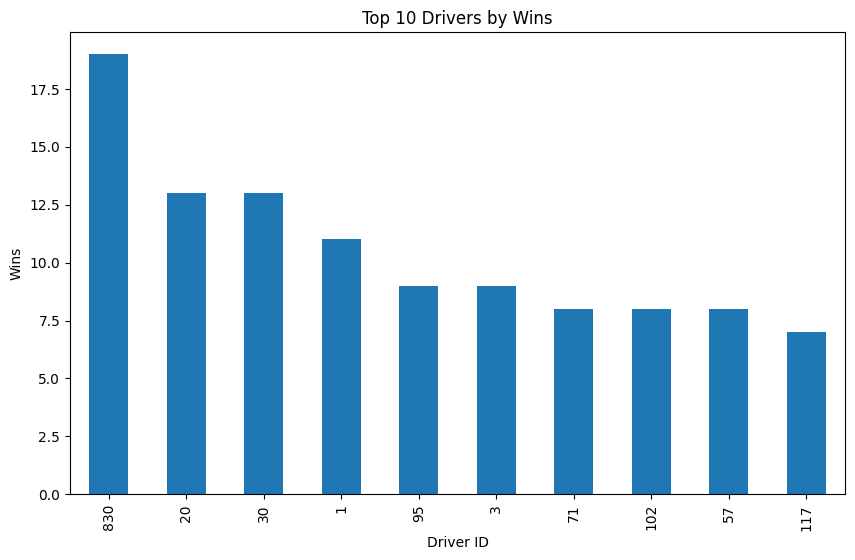

In [13]:


top_drivers = df.groupby('driverId')['wins_x'].max().sort_values(ascending=False).head(10)

top_drivers.plot(kind='bar', figsize=(10,6), title='Top 10 Drivers by Wins')
plt.xlabel('Driver ID')
plt.ylabel('Wins')
#plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


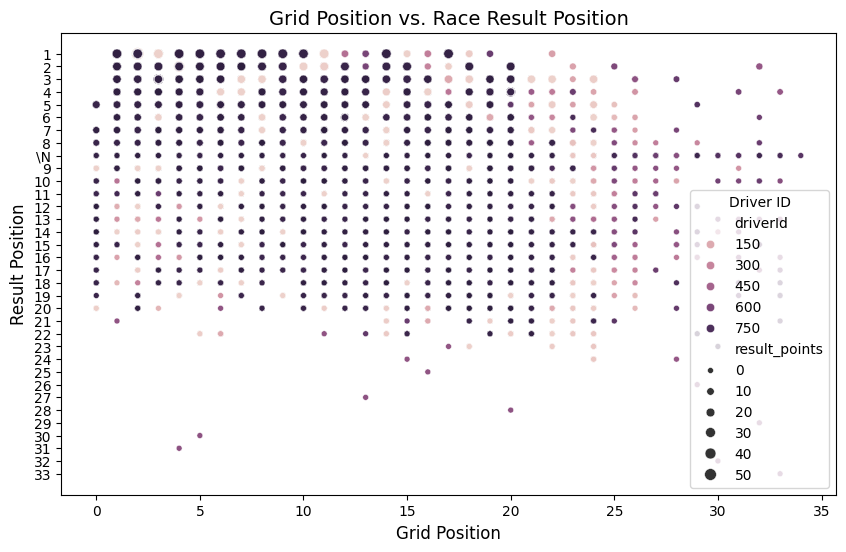

In [14]:
# 1. Scatter Plot: Grid Position vs. Result Position
plt.figure(figsize=(10, 6))
sns.scatterplot(x='grid', y='result_position', size='result_points', hue='driverId', data=df)
plt.title('Grid Position vs. Race Result Position', fontsize=14)
plt.xlabel('Grid Position', fontsize=12)
plt.ylabel('Result Position', fontsize=12)
plt.legend(title='Driver ID' )
plt.show()

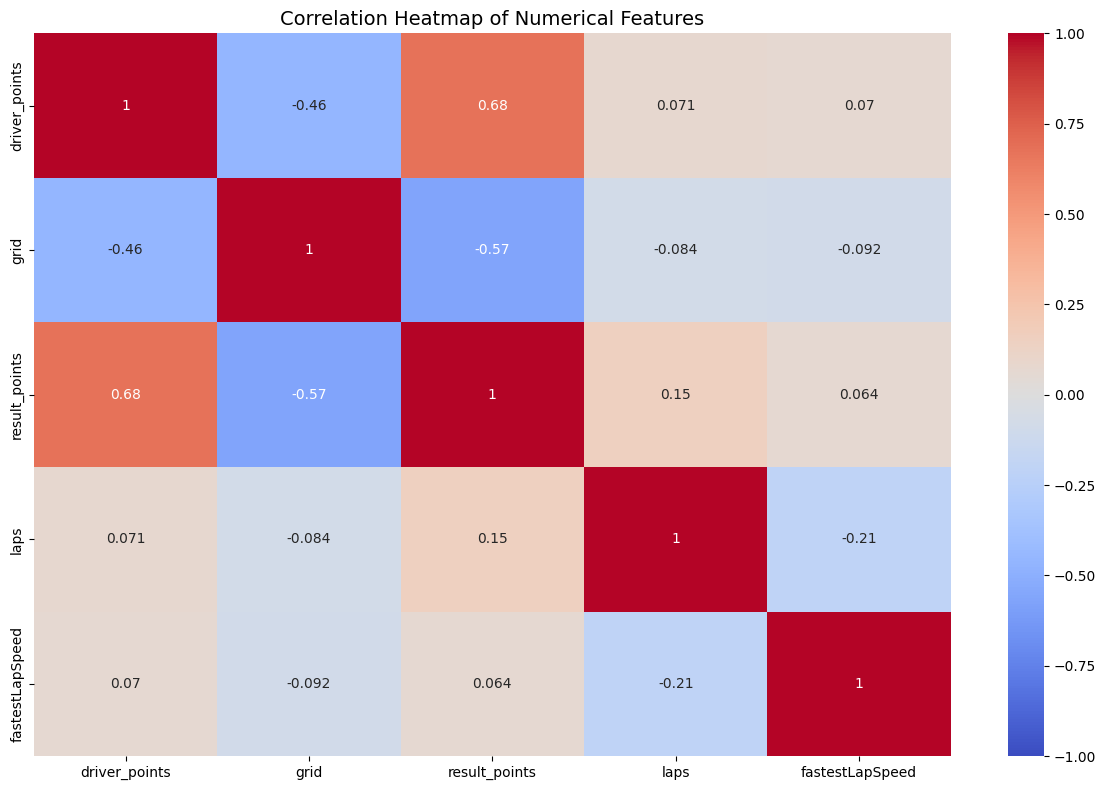

In [15]:
# 2. Heatmap: Correlation of Numerical Columns
plt.figure(figsize=(12, 8))
numerical_cols = ['driver_points', 'grid', 'result_points', 'laps', 'fastestLapSpeed']
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()

In [16]:
df['q1']

,q1
0,0 days 00:01:26.572000
1,0 days 00:01:26.572000
2,0 days 00:01:26.572000
3,0 days 00:01:26.572000
4,0 days 00:01:26.572000
...,...
604794,0 days 00:01:23.912000
604795,0 days 00:01:23.912000
604796,0 days 00:01:23.912000
604797,0 days 00:01:23.912000


In [17]:
print(df.duplicated().sum())

0


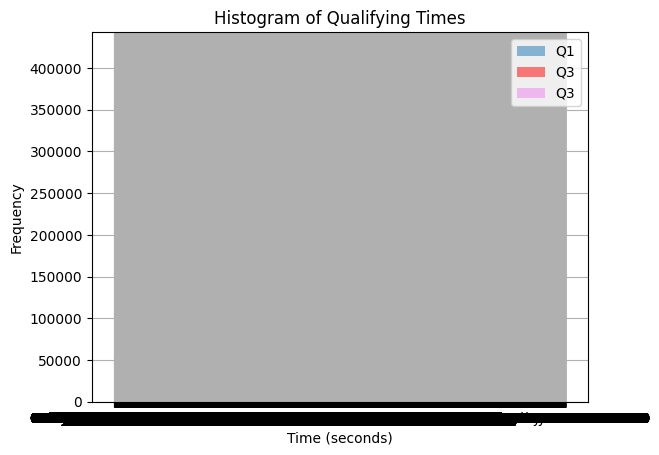

In [18]:
df['q1'].hist(bins=30, alpha=0.5, label='Q1')
df['q2'].hist(bins=30, alpha=0.5, label='Q3',color='red')
df['q3'].hist(bins=30, alpha=0.5, label='Q3',color='violet')
plt.legend()
plt.title('Histogram of Qualifying Times')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()


### FEATURE ENGINEERING

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['driver_points', 'constructor_points', 'fastestLapSpeed', 'laps']] = scaler.fit_transform(
    df[['driver_points', 'constructor_points', 'fastestLapSpeed', 'laps']]
)

In [20]:
df[['driver_points', 'constructor_points', 'fastestLapSpeed', 'laps']].head(5)

,driver_points,constructor_points,fastestLapSpeed,laps
0,-0.435849,-0.501457,0.793476,-0.04173
1,-0.435849,-0.501457,0.793476,-0.04173
2,-0.435849,-0.501457,0.793476,-0.04173
3,-0.435849,-0.501457,0.793476,-0.04173
4,-0.435849,-0.501457,0.793476,-0.04173


In [21]:
print(df[['grid', 'result_position']].dtypes)

grid                int64
result_position    object
dtype: object


In [22]:
df['grid'] = pd.to_numeric(df['grid'], errors='coerce')
df['result_position'] = pd.to_numeric(df['result_position'], errors='coerce')

In [23]:
df['result_position'] = df['result_position'].fillna(0)

In [24]:
df['result_position'].isnull().sum()

np.int64(0)

In [25]:
df['grid_to_result'] = df['grid'] - df['result_position']  # Positive = gained positions

In [26]:
df['qualifying_to_grid'] = df['qualifying_position'] - df['grid']

In [27]:
df['points_per_lap'] = df['result_points'] / df['laps'].replace(0, 1)  # Avoid division by zero

In [28]:
df['speed_efficiency'] = df['fastestLapSpeed'] / df.groupby('raceId')['fastestLapSpeed'].transform('max')

In [29]:
df.head()

,resultId,raceId,driverId,constructorId,number_x,grid,result_position,result_positionText,positionOrder,result_points,laps,result_time,result_milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverStandingsId,driver_points,driver_position,driver_positionText,wins_x,lap,lap_position,lap_time,lap_milliseconds,constructorStandingsId,constructor_points,constructor_position,constructor_positionText,wins_y,qualifyId,number_y,qualifying_position,q1,q2,q3,grid_to_result,qualifying_to_grid,points_per_lap,speed_efficiency
0,1,18,1,1,22.0,1,1.0,1.0,1,10.0,-0.04173,NaN,5690616.0,39.0,2.0,0 days 00:01:27.452000,0.793476,1,1.0,-0.435849,1.0,1.0,1.0,1.0,1.0,0 days 00:02:01.465000,121465.0,1.0,-0.501457,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000,0.0,0.0,-239.634202,0.994116
1,1,18,1,1,22.0,1,1.0,1.0,1,10.0,-0.04173,NaN,5690616.0,39.0,2.0,0 days 00:01:27.452000,0.793476,1,1.0,-0.435849,1.0,1.0,1.0,2.0,1.0,0 days 00:02:32.471000,152471.0,1.0,-0.501457,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000,0.0,0.0,-239.634202,0.994116
2,1,18,1,1,22.0,1,1.0,1.0,1,10.0,-0.04173,NaN,5690616.0,39.0,2.0,0 days 00:01:27.452000,0.793476,1,1.0,-0.435849,1.0,1.0,1.0,3.0,1.0,0 days 00:01:29.257000,89257.0,1.0,-0.501457,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000,0.0,0.0,-239.634202,0.994116
3,1,18,1,1,22.0,1,1.0,1.0,1,10.0,-0.04173,NaN,5690616.0,39.0,2.0,0 days 00:01:27.452000,0.793476,1,1.0,-0.435849,1.0,1.0,1.0,4.0,1.0,0 days 00:01:28.614000,88614.0,1.0,-0.501457,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000,0.0,0.0,-239.634202,0.994116
4,1,18,1,1,22.0,1,1.0,1.0,1,10.0,-0.04173,NaN,5690616.0,39.0,2.0,0 days 00:01:27.452000,0.793476,1,1.0,-0.435849,1.0,1.0,1.0,5.0,1.0,0 days 00:01:28.556000,88556.0,1.0,-0.501457,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000,0.0,0.0,-239.634202,0.994116


In [30]:
df.isnull().sum()

,0
resultId,0
raceId,0
driverId,0
constructorId,0
number_x,0
grid,0
result_position,0
result_positionText,73900
positionOrder,0
result_points,0


In [31]:
# Drop a single column
df = df.drop(columns=['fastestLap'])

In [32]:
df.head()

,resultId,raceId,driverId,constructorId,number_x,grid,result_position,result_positionText,positionOrder,result_points,laps,result_time,result_milliseconds,rank,fastestLapTime,fastestLapSpeed,statusId,driverStandingsId,driver_points,driver_position,driver_positionText,wins_x,lap,lap_position,lap_time,lap_milliseconds,constructorStandingsId,constructor_points,constructor_position,constructor_positionText,wins_y,qualifyId,number_y,qualifying_position,q1,q2,q3,grid_to_result,qualifying_to_grid,points_per_lap,speed_efficiency
0,1,18,1,1,22.0,1,1.0,1.0,1,10.0,-0.04173,NaN,5690616.0,2.0,0 days 00:01:27.452000,0.793476,1,1.0,-0.435849,1.0,1.0,1.0,1.0,1.0,0 days 00:02:01.465000,121465.0,1.0,-0.501457,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000,0.0,0.0,-239.634202,0.994116
1,1,18,1,1,22.0,1,1.0,1.0,1,10.0,-0.04173,NaN,5690616.0,2.0,0 days 00:01:27.452000,0.793476,1,1.0,-0.435849,1.0,1.0,1.0,2.0,1.0,0 days 00:02:32.471000,152471.0,1.0,-0.501457,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000,0.0,0.0,-239.634202,0.994116
2,1,18,1,1,22.0,1,1.0,1.0,1,10.0,-0.04173,NaN,5690616.0,2.0,0 days 00:01:27.452000,0.793476,1,1.0,-0.435849,1.0,1.0,1.0,3.0,1.0,0 days 00:01:29.257000,89257.0,1.0,-0.501457,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000,0.0,0.0,-239.634202,0.994116
3,1,18,1,1,22.0,1,1.0,1.0,1,10.0,-0.04173,NaN,5690616.0,2.0,0 days 00:01:27.452000,0.793476,1,1.0,-0.435849,1.0,1.0,1.0,4.0,1.0,0 days 00:01:28.614000,88614.0,1.0,-0.501457,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000,0.0,0.0,-239.634202,0.994116
4,1,18,1,1,22.0,1,1.0,1.0,1,10.0,-0.04173,NaN,5690616.0,2.0,0 days 00:01:27.452000,0.793476,1,1.0,-0.435849,1.0,1.0,1.0,5.0,1.0,0 days 00:01:28.556000,88556.0,1.0,-0.501457,1.0,1.0,1.0,1.0,22.0,1.0,0 days 00:01:26.572000,0 days 00:01:25.187000,0 days 00:01:26.714000,0.0,0.0,-239.634202,0.994116


## BUILDING THE MODEL

In [33]:
df['result_position']

,result_position
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
604794,0.0
604795,0.0
604796,0.0
604797,0.0


In [34]:
df['won_race'] = (df['result_position'] == 1).astype(int)


In [35]:
# Drop text and ID columns that don't help model prediction
drop_cols = [
    'result_position', 'result_positionText', 'driver_positionText', 'constructor_positionText',
    'won_race'  # Temporarily drop to define X
]

# Define features (X) and target (y)
X = df.drop(columns=drop_cols, errors='ignore')
X = X.select_dtypes(include=['int64', 'float64'])  # Only numeric features

y = df['won_race']


In [36]:
from sklearn.impute import SimpleImputer

# Fill missing values with median
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


MODELS

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
rf_score = best_rf.score(X_test, y_test)
print(f"✅ Random Forest Accuracy: {rf_score:.4f}")


✅ Random Forest Accuracy: 1.0000


In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
log_score = log_reg.score(X_test, y_test)
print(f"🔍 Logistic Regression Accuracy: {log_score:.4f}")


🔍 Logistic Regression Accuracy: 0.9699


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_score = xgb.score(X_test, y_test)
print(f"🚀 XGBoost Accuracy: {xgb_score:.4f}")


🚀 XGBoost Accuracy: 1.0000


In [48]:
print("🔄 Model Comparison:")
print(f"Random Forest: {rf_score:.4f}")
print(f"Logistic Regression: {log_score:.4f}")
print(f"XGBoost: {xgb_score:.4f}")


🔄 Model Comparison:
Random Forest: 1.0000
Logistic Regression: 0.9699
XGBoost: 1.0000


In [49]:
import joblib

# Save the best-performing model (example: if XGBoost wins)
joblib.dump(xgb, 'best_f1_model_xgboost.pkl')


['best_f1_model_xgboost.pkl']

In [50]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib


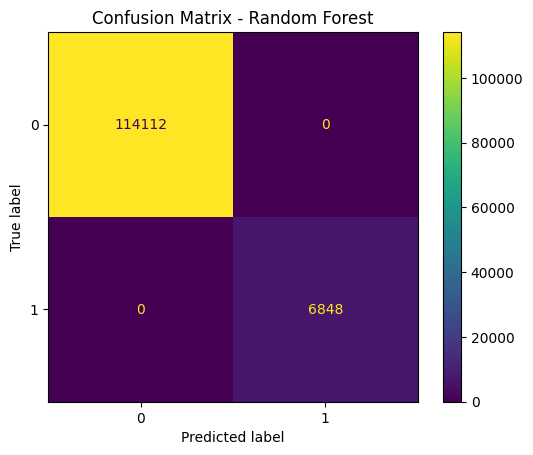

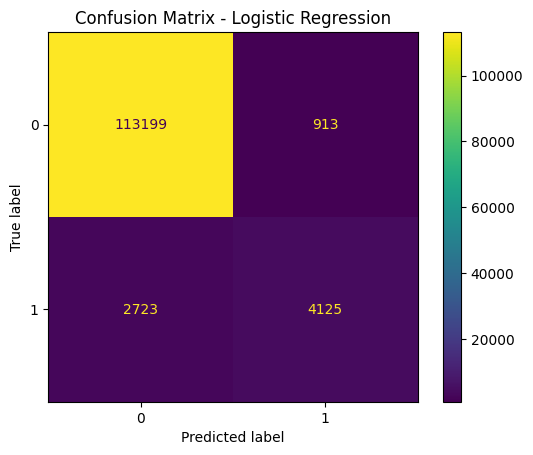

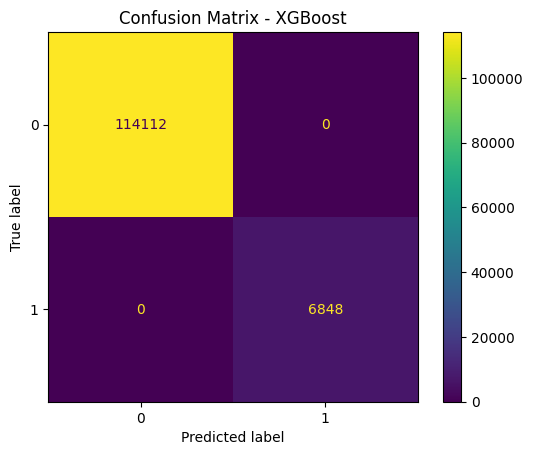

In [51]:
models = {
    'Random Forest': best_rf,
    'Logistic Regression': log_reg,
    'XGBoost': xgb
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


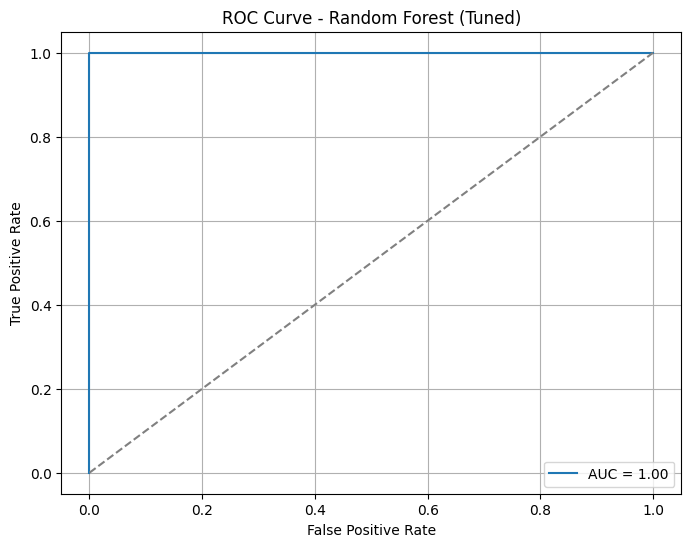

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Use the best fitted random forest model from GridSearchCV
y_prob = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Tuned)")
plt.legend()
plt.grid(True)
plt.show()
